In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Dictionary
survival - Survival - 0 = No, 1 = Yes <br>
pclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex - Sex <br>
Age - Age in years	 <br>
sibsp - # of siblings / spouses aboard the Titanic	 <br>
parch - # of parents / children aboard the Titanic	 <br>
ticket - Ticket number	 <br>
fare - Passenger fare	 <br>
cabin - Cabin number	 <br>
embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Importing the dataset

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

data = [train, test]

## Exploring the Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Exploring the Cabin Column

In [6]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([A-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [8]:
p_id = test['PassengerId']
train.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [9]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,8


In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,6.936027
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,2.074282
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,8.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,8.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,8.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


- In Age column, the mean > median, we can assume that if the Age column in normally distributed, it is positively skewed. <br>
- The Fare column is also positively skewed.

In [11]:
data = [train, test]
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                                 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Others,0.312500


In [13]:
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis = 1, inplace = True)

In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [17]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [18]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0


- Age has a high percentage of missing values.
- Age is a primary factor in determining whether they survived or not.
- Therefore, we cannot drop the 'Age' column.

## How to fill the NA values in Age column?
<br>
- Age seems to be promising feature. So it doesn't make sense to simply fill null values out with median/mean/mode.
- Let us visualize the Age column based on Sex of passengers.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


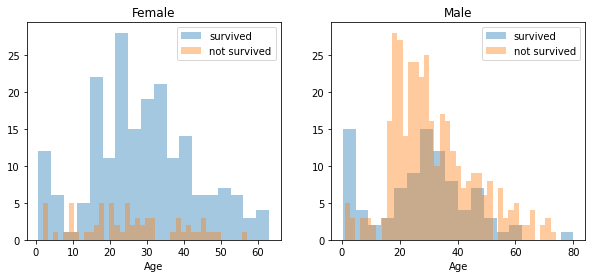

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## Inferences

- Certain Age groups have higher chances of survival which is evident from the distplot.
- Infants have higher chances of survival.
- Women have higher chances of survival than men.
- Men aged 5 to 18 have low chances of survival.
- Women aged 14-30 have higher chances of survival.
- Men aged 18-30 have higher chances of survival.

## Dealing with Age missing values

In [20]:
data = [train, test]

for dataset in data:
    mean = train['Age'].mean()
    std = train['Age'].std()
    null_val = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size = null_val)
    
    age_slice = dataset['Age']
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train['Age'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
train['Age'].isnull().sum()

0

## Now we deal with the missing values in the embarked column.

In [22]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
most_freq_val = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_freq_val)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    int64  
 9   Title     891 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB


## Filling in the Missing values in Fare column

In [26]:
data = [train, test]

for dataset in data:
    mean_fare = dataset['Fare'].fillna(0).mean()
    dataset['Fare'] = dataset['Fare'].fillna(mean_fare)

test['Fare'].isnull().sum()

0

## Grouping Age values

In [27]:
# data = [train, test]

# for dataset in data:
#     dataset['Age'] = pd.qcut(dataset['Age'], q = 6, labels= False)

# # let's see how it's distributed train['Age'].value_counts()

In [28]:
train['Age'].value_counts()

28    37
24    35
21    32
30    32
18    32
      ..
12     1
53     1
80     1
66     1
74     1
Name: Age, Length: 71, dtype: int64

<b>NOTE:</b> Experiment with bins and cut() function to refine the model accuracy. <br>
Also, implement the 'Name' and 'Cabin' columns as features.

## Checking for Outliers in 'Fare' column
- Look for outliers in 'Fare' column.
- If outliers present, perform robust scaling and then standard/minmax scaling.
- No categorising 'Fare' column.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

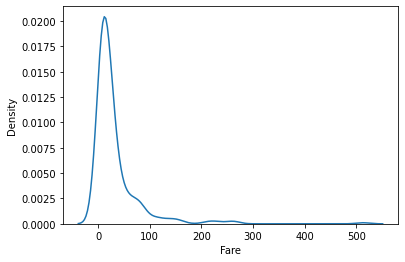

In [29]:
sns.distplot(train['Fare'], hist = False, kde = True)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

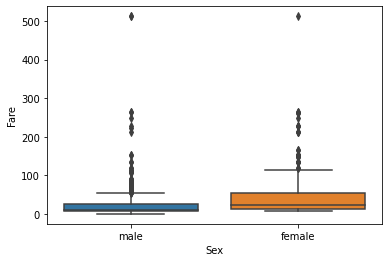

In [30]:
ax = sns.boxplot(x = "Sex", y = "Fare", data=train)
ax

### Observations:

- Multiple outliers present in the 'Fare' feature for both the genders.
- We proceed to perform RobustScaler on the 'Fare' column and then proceed to scale with Standard/MinMax scaler.

## Scaling and Standardisation

In [31]:
from sklearn.preprocessing import RobustScaler, StandardScaler

rs = RobustScaler()

for dataset in data:
    f = pd.Series(dataset['Fare'])
    arr = f.values
    arr = arr.reshape(-1, 1)
    dataset['Fare'] = rs.fit_transform(arr)

sc = StandardScaler()

for dataset in data:
    f = pd.Series(dataset['Fare'])
    arr = f.values
    arr = arr.reshape(-1, 1)
    dataset['Fare'] = sc.fit_transform(arr)

## Grouping Fare values

In [32]:
train['Fare'].describe()

count    8.910000e+02
mean    -2.859665e-17
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare, dtype: float64

In [33]:
# for dataset in data:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
#     dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
#     dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
#     dataset['Fare'] = dataset['Fare'].astype(int)

# # for dataset in data:
# #     dataset['Fare'] = pd.qcut(dataset['Fare'], q = 6, labels= False)

In [34]:
# train['Fare'].value_counts()

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,-0.502445,S,8,Mr
1,1,1,female,38,1,0,0.786845,C,3,Mrs
2,1,3,female,26,0,0,-0.488854,S,8,Miss
3,1,1,female,35,1,0,0.420730,S,3,Mrs
4,0,3,male,35,0,0,-0.486337,S,8,Mr


In [36]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,male,22,0,0,-0.498403,Q,8,Mr
1,3,female,38,1,0,-0.513271,S,8,Mrs
2,2,male,26,0,0,-0.465085,Q,8,Mr
3,3,male,35,0,0,-0.483463,S,8,Mr
4,3,female,35,1,1,-0.418468,S,8,Mrs


In [37]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

In [38]:
# for dataset in data:
#     dataset.drop(['not_alone'], axis = 1, inplace = True)

In [39]:
num_cols = ['SibSp', 'Parch', 'Age', 'relatives']

for dataset in data:
    for col in num_cols:
        f = pd.Series(dataset[col])
        arr = f.values
        arr = arr.reshape(-1, 1)
        dataset[col] = sc.fit_transform(arr)

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['Sex', 'Embarked', 'Title']
data = [train, test]
for dataset in data:
    for col in cat_cols:
        dataset[col] = le.fit_transform(dataset[col])

In [41]:
train.insert(len(train.columns)-1, 'Survived', train.pop('Survived'))
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Survived
0,3,1,-0.566366,0.432793,-0.473674,-0.502445,2,8,3,0.059160,0,0
1,1,0,0.615961,0.432793,-0.473674,0.786845,0,3,4,0.059160,0,1
2,3,0,-0.270784,-0.474545,-0.473674,-0.488854,2,8,2,-0.560975,1,1
3,1,0,0.394275,0.432793,-0.473674,0.420730,2,3,4,0.059160,0,1
4,3,1,0.394275,-0.474545,-0.473674,-0.486337,2,8,3,-0.560975,1,0


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone
0,3,1,-0.509190,-0.499470,-0.400248,-0.498403,1,8,3,-0.553443,1
1,3,0,0.700565,0.616992,-0.400248,-0.513271,2,8,4,0.105643,0
2,2,1,-0.206751,-0.499470,-0.400248,-0.465085,1,8,3,-0.553443,1
3,3,1,0.473736,-0.499470,-0.400248,-0.483463,2,8,3,-0.553443,1
4,3,0,0.473736,0.616992,0.619896,-0.418468,2,8,4,0.764728,0


## Model Evaluation

In [43]:
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import accuracy_score

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 33)

## Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators= 500)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = round(accuracy_score(y_test, rf_pred), 2)*100

### Random Forest Feature Importances

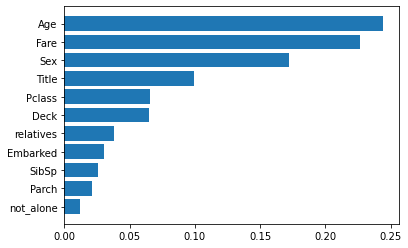

In [48]:
features = X.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

## Decision Tree

In [49]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = round(accuracy_score(y_test, dtree_pred), 4)*100

## Logistic Regresion

In [50]:
logr = LogisticRegression()

logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)
logr_acc = round(accuracy_score(y_test, logr_pred), 4)*100

## Gaussian Naive Bayes

In [51]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = round(accuracy_score(y_test, gnb_pred), 4)*100

## K-Nearest Neighbors

In [52]:
knn = KNeighborsClassifier(n_neighbors= 7)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test, knn_pred), 4)*100

In [53]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 
              'Gaussian Naive Bayes', 'K-Nearest Neighbors'],
    'Score': [rf_acc, dtree_acc, logr_acc, gnb_acc, knn_acc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
0,Random Forest,84.00
2,Logistic Regression,82.37
3,Gaussian Naive Bayes,82.37
4,K-Nearest Neighbors,81.36
1,Decision Tree,78.31


In [54]:
print("Mean Score of Models: ", round(result_df['Score'].mean(), 3))

Mean Score of Models:  81.682


## Submission File Code

In [55]:
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [56]:
reg = LogisticRegression()

reg.fit(X, y)
predictions = reg.predict(test)

In [57]:
predictions = pd.DataFrame(predictions)
p_id = pd.DataFrame(p_id)

results = pd.concat([p_id, predictions], axis=1).reset_index(drop = True)
results.columns = ["PassengerId", "Survived"]
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
results.to_csv("submission.csv", index = False)